In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')
data.shape

#loading the save numpy arrays in the previous code

(13172, 256, 256, 1)

In [ ]:
import tensorflow as tf ### Models
import matplotlib.pyplot as plt ### Plotting Bar Chart
import numpy as np ### Maths Computations
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

In [ ]:
Model1 = tf.keras.Sequential([
    InputLayer(input_shape = data.shape[1:]),

    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(), 

    Dense(200, activation = 'relu'),
    BatchNormalization(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(2, activation = 'softmax')
])
Model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 6)         60        
                                                                 
 batch_normalization_4 (Bat  (None, 98, 98, 6)         24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 16)        880       
                                                                 
 batch_normalization_5 (Bat  (None, 47, 47, 16)        64        
 chNormalization)                                                
                                                      

In [ ]:
Model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
import tensorflow as tf ### Models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Layer, Add, Activation
from tensorflow.keras.models import Model 

class CustomConv2D(Layer):
  def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
    super(CustomConv2D, self).__init__(name = 'custom_conv2d')

    self.conv = Conv2D(
        filters = n_filters,
        kernel_size = kernel_size,
        activation = 'relu',
        strides = n_strides,
        padding = padding)
    
    self.batch_norm = BatchNormalization()

  def call(self, x, training = True):

    x = self.conv(x)
    x = self.batch_norm(x, training)

    return x

In [ ]:
class ResidualBlock(Layer):
  def __init__(self, n_channels, n_strides = 1):
    super(ResidualBlock, self).__init__(name = 'res_block')

    self.dotted = (n_strides != 1)

    

    self.custom_conv_1 = CustomConv2D(n_channels, 3, n_strides, padding = "same")
    self.custom_conv_2 = CustomConv2D(n_channels, 3, 1, padding = "same")

    self.activation = Activation('relu')

    if self.dotted:
      self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)
    
  def call(self, input, training):

    x = self.custom_conv_1(input)
    x = self.custom_conv_2(x)

    if self.dotted:
      x_add = self.custom_conv_3(input)
      x_add = Add()([x, x_add])
    else:
      x_add = Add()([x])

    return self.activation(x_add)


In [ ]:
class ResNet34(Model):
  def __init__(self):
    super(ResNet34, self).__init__(name = 'resnet_34')
    

    self.conv_1 = CustomConv2D(64, 7, 2, padding = 'same')
    self.max_pool = MaxPooling2D(3,2)
    
    self.conv_2_1 = ResidualBlock(64)
    self.conv_2_2 = ResidualBlock(64)
    self.conv_2_3 = ResidualBlock(64)
    
    self.conv_3_1 = ResidualBlock(128, 2)
    self.conv_3_2 = ResidualBlock(128)
    self.conv_3_3 = ResidualBlock(128)
    self.conv_3_4 = ResidualBlock(128)

    self.conv_4_1 = ResidualBlock(256, 2)
    self.conv_4_2 = ResidualBlock(256)
    self.conv_4_3 = ResidualBlock(256)
    self.conv_4_4 = ResidualBlock(256)
    self.conv_4_5 = ResidualBlock(256)
    self.conv_4_6 = ResidualBlock(256)
    
    self.conv_5_1 = ResidualBlock(512, 2)
    self.conv_5_2 = ResidualBlock(512)
    self.conv_5_3 = ResidualBlock(512)

    self.global_pool = GlobalAveragePooling2D()

    self.fc_3 = Dense(2, activation = 'softmax')
    
  def call(self, x):
    
    x = self.conv_1(x)
    x = self.max_pool(x)

    x = self.conv_2_1(x)
    x = self.conv_2_2(x)
    x = self.conv_2_3(x)
    
    x = self.conv_3_1(x)
    x = self.conv_3_2(x)
    x = self.conv_3_3(x)
    x = self.conv_3_4(x)
    
    x = self.conv_4_1(x)
    x = self.conv_4_2(x)
    x = self.conv_4_3(x)
    x = self.conv_4_4(x)
    x = self.conv_4_5(x)
    x = self.conv_4_6(x)
    
    x = self.conv_5_1(x)
    x = self.conv_5_2(x)
    x = self.conv_5_3(x)

    x = self.global_pool(x)
    
    return self.fc_3(x)
     






In [ ]:
resnet_34 = ResNet34()
resnet_34(tf.zeros([1, 256, 256, 1]), training = False)
resnet_34.summary()

Model: "resnet_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_conv2d (CustomConv2  multiple                  3456      
 D)                                                              
                                                                 
 max_pooling2d_24 (MaxPooli  multiple                  0         
 ng2D)                                                           
                                                                 
 res_block (ResidualBlock)   multiple                  74368     
                                                                 
 res_block (ResidualBlock)   multiple                  74368     
                                                                 
 res_block (ResidualBlock)   multiple                  74368     
                                                                 
 res_block (ResidualBlock)   multiple                  23

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


In [ ]:
resnet_34.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print("Num TPUs Available: ", len(tf.config.list_physical_devices('TPU')))

Num TPUs Available:  0


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=resnet_34.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
297/297 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.7947 INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


297/297 [==============================] - 4586s 15s/step - loss: 0.5158 - accuracy: 0.7947 - val_loss: 1.1217 - val_accuracy: 0.4665
Epoch 2/10
297/297 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 0.9014 INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


297/297 [==============================] - 3486s 12s/step - loss: 0.2494 - accuracy: 0.9014 - val_loss: 0.6589 - val_accuracy: 0.6858
Epoch 3/10
297/297 [==============================] - ETA: 0s - loss: 0.1769 - accuracy: 0.9330 INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


297/297 [==============================] - 4509s 15s/step - loss: 0.1769 - accuracy: 0.9330 - val_loss: 0.3757 - val_accuracy: 0.8511
Epoch 4/10
297/297 [==============================] - 4305s 15s/step - loss: 0.1348 - accuracy: 0.9495 - val_loss: 1.9512 - val_accuracy: 0.4627
Epoch 5/10
297/297 [==============================] - ETA: 0s - loss: 0.1268 - accuracy: 0.9544INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


297/297 [==============================] - 2944s 10s/step - loss: 0.1268 - accuracy: 0.9544 - val_loss: 0.3197 - val_accuracy: 0.8676
Epoch 6/10
297/297 [==============================] - 2789s 9s/step - loss: 0.1020 - accuracy: 0.9621 - val_loss: 0.3441 - val_accuracy: 0.9072
Epoch 7/10
297/297 [==============================] - 3051s 10s/step - loss: 0.0842 - accuracy: 0.9698 - val_loss: 0.4650 - val_accuracy: 0.8102
Epoch 8/10
297/297 [==============================] - 3792s 13s/step - loss: 0.0688 - accuracy: 0.9761 - val_loss: 0.7001 - val_accuracy: 0.8292
Epoch 9/10
297/297 [==============================] - 3363s 11s/step - loss: 0.0768 - accuracy: 0.9713 - val_loss: 0.3968 - val_accuracy: 0.8908
Epoch 10/10
297/297 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.9777INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


297/297 [==============================] - 3152s 11s/step - loss: 0.0615 - accuracy: 0.9777 - val_loss: 0.0742 - val_accuracy: 0.9722


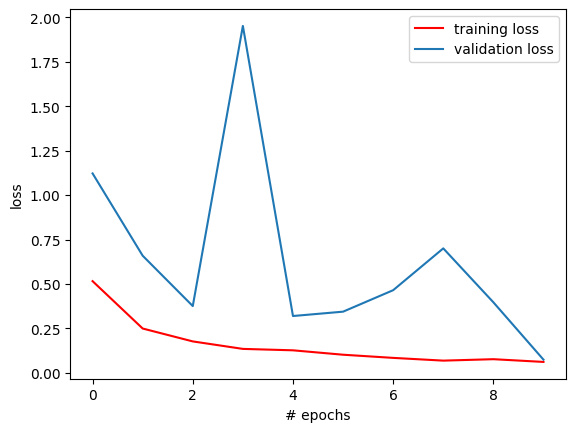

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

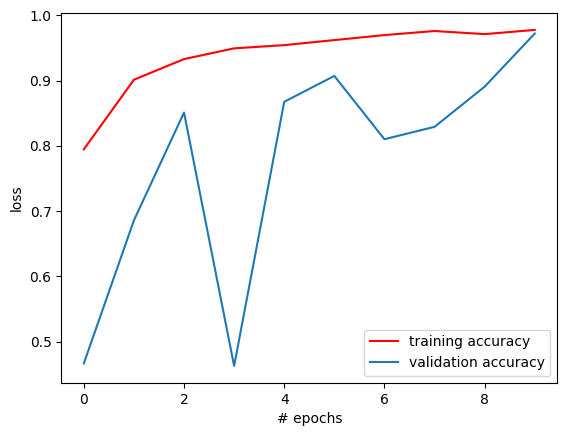

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(resnet_34.evaluate(test_data,test_target))

42/42 [==============================] - 136s 3s/step - loss: 0.1123 - accuracy: 0.9643
[0.11230519413948059, 0.9643399119377136]


In [ ]:
resnet_34.save('1ResNet34_best.tf')

INFO:tensorflow:Assets written to: 1ResNet34_best.tf\assets


INFO:tensorflow:Assets written to: 1ResNet34_best.tf\assets
